# House Prices - Advanced Regression Techniques

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home, I am going to implement a ML regression model to predict each house price.

[you can know more about th data here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

### Linear Regression

In [92]:
# import libs 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# stats imports
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency 

# sklearn imports
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Model building Imports 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

## Read the preprocessed data

In [93]:
# load data
x = pd.read_csv("train_preprocessed.csv")
y = pd.read_csv("y_preprocessed.csv")

#load test
test = pd.read_csv("test_preprocessed.csv")

In [94]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 96 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1460 non-null   int64  
 1   0           1460 non-null   float64
 2   1           1460 non-null   float64
 3   2           1460 non-null   float64
 4   3           1460 non-null   float64
 5   4           1460 non-null   float64
 6   5           1460 non-null   float64
 7   6           1460 non-null   float64
 8   7           1460 non-null   float64
 9   8           1460 non-null   float64
 10  9           1460 non-null   float64
 11  10          1460 non-null   float64
 12  11          1460 non-null   float64
 13  12          1460 non-null   float64
 14  13          1460 non-null   float64
 15  14          1460 non-null   float64
 16  15          1460 non-null   float64
 17  16          1460 non-null   float64
 18  17          1460 non-null   float64
 19  18          1460 non-null  

In [95]:
x.drop("Unnamed: 0", axis = 1, inplace = True)

In [96]:
y.drop("Unnamed: 0", axis = 1, inplace = True)

In [97]:
test.drop("Unnamed: 0", axis = 1, inplace = True)

In [98]:
test.dropna(inplace = True)

In [99]:
x = x.to_numpy()

In [100]:
x.shape

(1460, 95)

In [101]:
y = y.to_numpy()

In [102]:
y.shape

(1460, 1)

In [103]:
test = test.to_numpy()

In [104]:
test.shape

(1454, 95)

### Split the train data to Train and Cross-Validation

In [105]:
# splitin the data into training and cross-validation
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size = .1, random_state = 101)

### Model fit and Evaluation

In [106]:
# initalize the model
lr = LinearRegression()

In [107]:
# fit the model to the data
lr.fit(x_train, y_train)

LinearRegression()

In [108]:
# predict the target for the cv data set
lr_predictions = lr.predict(x_train)

In [109]:
# compute the RMSE, and MSE
MAE = mean_absolute_error(np.expm1(lr_predictions), np.expm1(y_train))
MSE = mean_squared_error(np.expm1(lr_predictions), np.expm1(y_train))
RMSE = np.sqrt(MSE)

In [110]:
# print the RMSE, and MSE
print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")

Mean Absolute Error: 15894.45303203133
Mean Squared Error: 1014252616.5315789
Root Mean Squared Error: 31847.332957903694


In [111]:
# get model coeff
lr.coef_

array([[-3.82285752e-03,  1.30601526e-02,  3.41081581e-02,
         4.78487605e-03, -4.18963405e-03,  1.94950698e-02,
         2.42370831e-03,  7.47660290e-03, -2.29350013e-02,
         9.12663787e-02,  1.84621798e-02,  1.18269434e-02,
         2.70768759e-02,  2.21810643e-02,  4.38846881e-02,
         1.09412704e-03,  1.16273728e-02,  1.19466726e-02,
         5.11965732e-03,  7.80674880e-02,  4.46384379e-02,
        -2.21115837e-03,  1.48987300e-03,  2.18874636e-02,
         7.40919959e-03,  1.95951004e-02,  2.35604642e-02,
         1.51907566e-02,  4.16291760e-03, -1.24189442e+10,
        -3.10559242e+10, -1.56763252e+10, -6.15060132e+10,
        -5.36648254e+10, -5.54844819e+09, -5.54844819e+09,
         8.15324868e+10,  5.20708918e+10,  3.74477518e+10,
         1.10896138e+10,  9.52014780e+10,  3.83162467e+09,
         1.32104951e+09,  3.71850973e+09,  6.97611030e+09,
         4.89864378e+09,  1.08444271e+10,  6.55791706e+09,
         9.02183311e+09,  8.08045321e+09,  5.61343434e+0

In [112]:
# get the intercept value
lr.intercept_

array([12.0241113])

In [113]:
# get the r2 
r2_score(y_train, lr_predictions)

0.8975894033863351

In [114]:
# get the residuals 
residuals = np.expm1(lr_predictions) -  np.expm1(y_train)

C:\Users\original\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

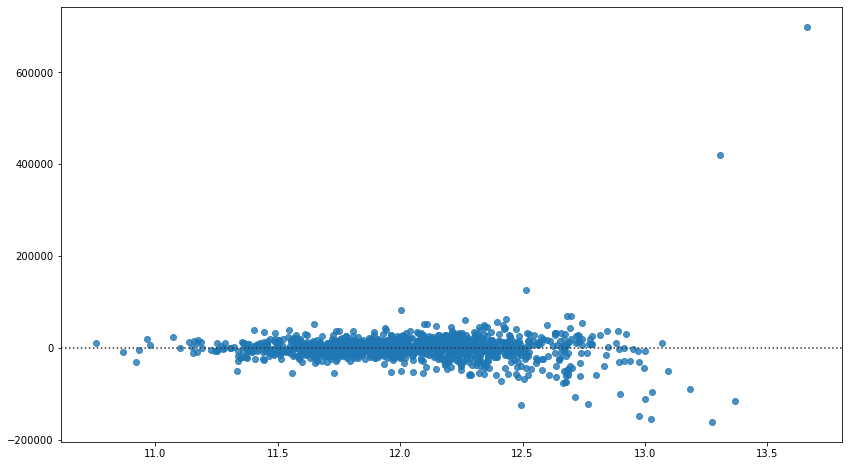

In [115]:
# plot residuals plot
plt.figure(figsize=(14, 8))
sns.residplot(lr_predictions, residuals)

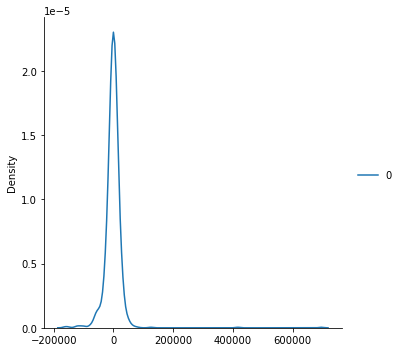

In [116]:
# draw the distribution of residuals
sns.displot(residuals, kind = "kde")

In [117]:
# PREDICT ON BOTH TRAIN AND TEST CV
lr_pred_cv = lr.predict(x_cv)

# Calculate Errors
# compute the RMSE, and MSE
MAE_2 = mean_absolute_error(np.expm1(lr_pred_cv), np.expm1(y_cv))
MSE_2 = mean_squared_error(np.expm1(lr_pred_cv), np.expm1(y_cv))
RMSE_2 = np.sqrt(MSE_2)

In [118]:
# print the RMSE, and MSE
print(f"Mean Absolute Error: {MAE_2}")
print(f"Mean Squared Error: {MSE_2}")
print(f"Root Mean Squared Error: {RMSE_2}")

Mean Absolute Error: 15557.453989792542
Mean Squared Error: 477103011.3693233
Root Mean Squared Error: 21842.687823830733


In [119]:
cross_val_error = cross_val_score(lr, x_train, y_train, cv = 5)

In [120]:
cross_val_error

array([ 7.82327174e-01, -2.22579400e+21, -1.83782550e+21,  8.72656262e-01,
        8.69936638e-01])

In [121]:
cross_val_error.mean()

-8.127238999788826e+20

### ElasticNet

In [122]:
# init the ElasticNet model
l1_space = np.linspace(0, 1, 50)
param_grid = {'l1_ratio': l1_space}
elastic_net = ElasticNet()

In [123]:
gm_cv = GridSearchCV(elastic_net, param_grid, cv=10, scoring = 'neg_root_mean_squared_error')
gm_cv.fit(x_train, y_train)

C:\Users\original\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.137713127783037, tolerance: 0.018386478671333327
  model = cd_fast.enet_coordinate_descent(
C:\Users\original\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.459784679114197, tolerance: 0.01899585960857885
  model = cd_fast.enet_coordinate_descent(
C:\Users\original\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.649287187236844, tolerance: 0.019359376732211792
  model = cd_fast.enet_coordinate_descent(
C:\Users\original\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'l1_ratio': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             scoring='neg_root_mean_squared_error')

In [124]:
gm_cv.score(x_train, y_train)

-0.14157177378231

### Ridge Model

In [125]:
# init the model
alpha_space = np.linspace(0, 1, 50)
params_grid = {'alpha':alpha_space}
ridge = Ridge()

In [126]:
ridge_cv = GridSearchCV(ridge, params_grid, cv=10, scoring = 'neg_root_mean_squared_error')
ridge_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             scoring='neg_root_mean_squared_error')

In [127]:
ridge_cv.score(x_train, y_train)

-0.12820273173263533

### Lasso

In [128]:
# init the model
alpha_space = np.linspace(0, 1, 50)
params_grid = {'alpha':alpha_space}
lasso = Lasso()

In [129]:
lasso_cv = GridSearchCV(lasso, params_grid, cv=10, scoring = 'neg_root_mean_squared_error')
lasso_cv.fit(x_train, y_train)

C:\Users\original\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\original\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\original\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.739705033304276, tolerance: 0.018386478671333327
  model = cd_fast.enet_coordinate_descent(
C:\Users\original\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegres

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             scoring='neg_root_mean_squared_error')

In [130]:
lasso_model = lasso_cv.best_estimator_

### SGD Regressor

In [131]:
# init the model
alpha_space = np.linspace(0, 1, 30)
params_grid = {'alpha':alpha_space}
SGD = SGDRegressor()

In [132]:
SGD_cv = GridSearchCV(SGD, params_grid, cv=10, scoring = 'neg_root_mean_squared_error')
SGD_cv.fit(x_train, y_train)

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

GridSearchCV(cv=10, estimator=SGDRegressor(),
             param_grid={'alpha': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])},
             scoring='neg_root_mean_squared_error')

In [133]:
SGD_cv.score(x_train, y_train)

-0.1372138044204595

## Prediction Using Lasso Model

In [152]:
# get the prediction with exponential value to reverse the log transformation
test_submission = np.expm1(lasso_model.predict(test))

In [155]:
submission = pd.DataFrame(test_submission, columns = ["price"])
submission.to_csv("submission.csv")

In [156]:
submission

,price
0,125507.922759
1,162033.482162
2,177534.009981
3,198929.016411
4,206184.932673
...,...
1449,116091.033986
1450,113789.173218
1451,160116.050808
1452,152360.675602
